In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("spotify_songs.csv")
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [6]:
features = ['energy', 'valence', 'tempo', 'instrumentalness', 'speechiness']
df_features = df[features].copy()

In [7]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=features)

In [8]:
df_scaled['track_name'] = df['track_name']
df_scaled['artists'] = df['artists']
df_scaled['track_id'] = df['track_id']

In [9]:
query_tracks = [
    "To Begin Again",
    "Can't Help Falling In Love",
    "Ghost - Acoustic"
]

In [10]:
query_df = df_scaled[df_scaled['track_name'].isin(query_tracks)]
if query_df.empty:
    raise ValueError("None of the query tracks found in the dataset!")

In [11]:
df_scaled = df_scaled.drop_duplicates(subset=['track_name', 'artists'])

In [12]:
similarity_results = {}

for _, query in query_df.iterrows():
    query_vector = query[features].values.reshape(1, -1)
    similarities = cosine_similarity(query_vector, df_scaled[features])[0]
    
    df_scaled['similarity'] = similarities
    top_similar = df_scaled.sort_values(by='similarity', ascending=False)
    top_similar = top_similar[top_similar['track_id'] != query['track_id']]
    top_10 = top_similar[['track_name', 'artists', 'similarity']].head(10)
    
    similarity_results[query['track_name']] = top_10

In [13]:
for track_name, similar_tracks in similarity_results.items():
    print(f"\n🎵 Top 10 songs similar to '{track_name}':\n")
    print(similar_tracks.to_string(index=False))


🎵 Top 10 songs similar to 'Ghost - Acoustic':

              track_name                           artists  similarity
   Stacking Up The Rocks                      Balsam Range    0.999274
           don't give up                             yaeow    0.999057
            Boi Soberano                      Mayck & Lyan    0.999004
        Please Come Back Teqkoi;Ondi Vil;Thomas Reid;Bonjr    0.998880
Walking Through The Rain           SadBoyProlific;Iriasona    0.998682
    Песенка кавалергарда                   Elena Kamburova    0.998658
   Son Of A Preacher Man                 Dusty Springfield    0.998592
                  Celosa                   Mercedes Simone    0.998567
                Cucusita                    Miguel Montero    0.998487
            time machine               mj apanay;aren park    0.998482

🎵 Top 10 songs similar to 'To Begin Again':

                                     track_name                          artists  similarity
                                

C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


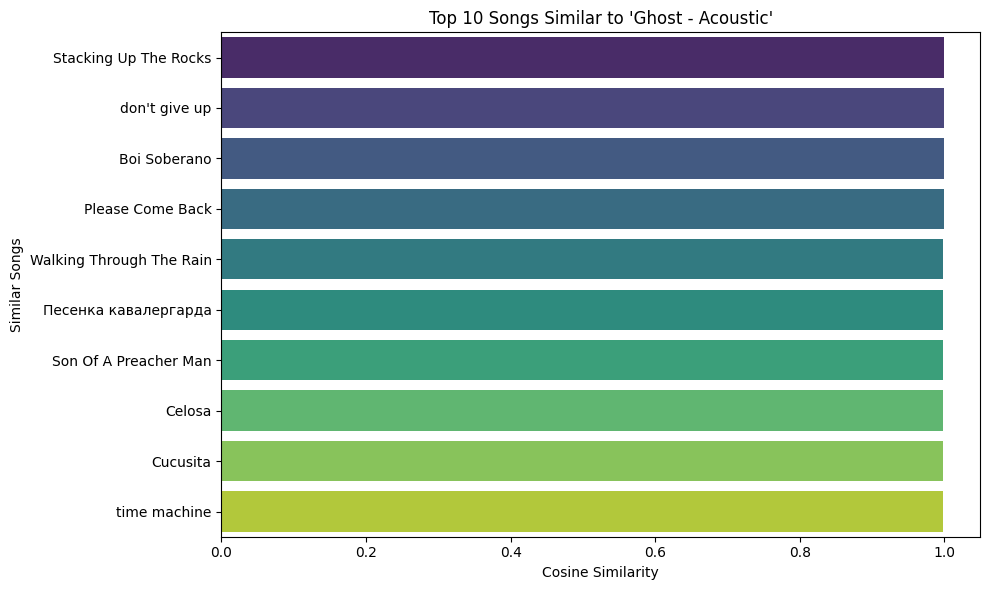

C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


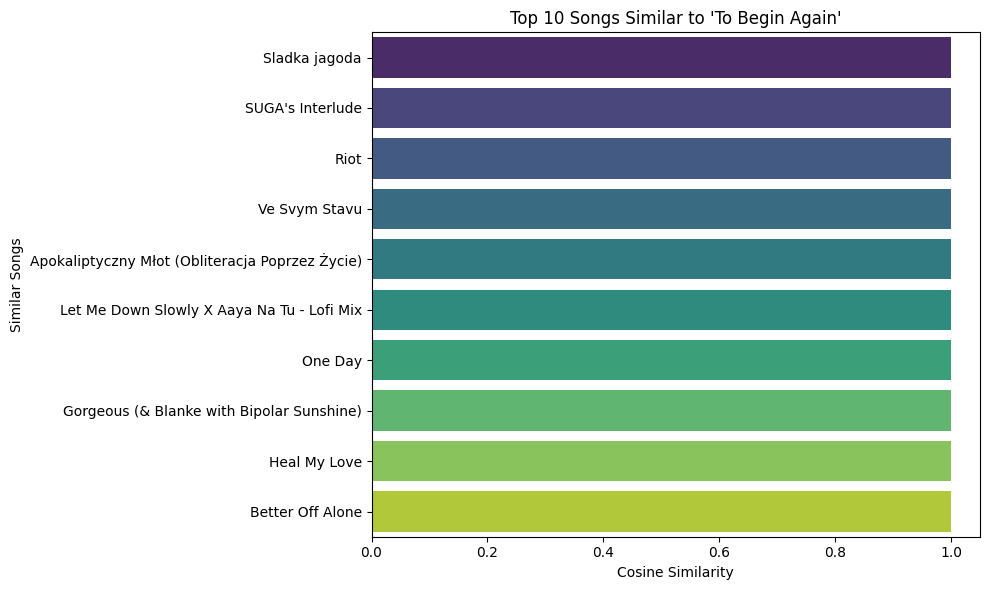

C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:11: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:11: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:11: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krist\AppData\Local\Temp\ipykernel_23828\542572985.py:11: UserWarning: Glyph 30332 (\N{CJK UNIFIED IDEOGRAPH-767C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krist\A

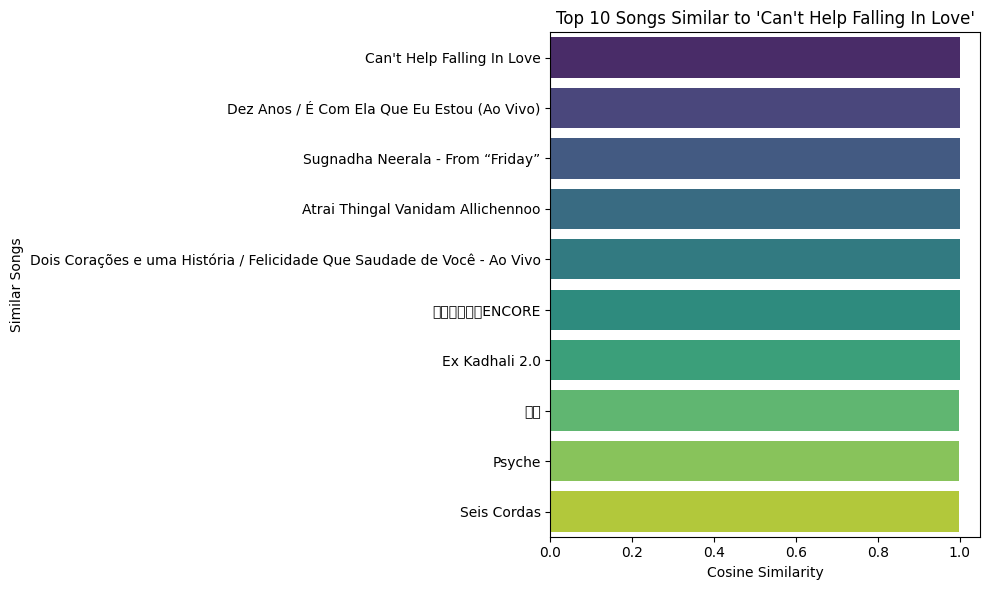

In [16]:
for track_name, similar_tracks in similarity_results.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(
        y=similar_tracks['track_name'],
        x=similar_tracks['similarity'],
        palette='viridis',
    )
    plt.title(f"Top 10 Songs Similar to '{track_name}'")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Similar Songs")
    plt.tight_layout()
    plt.show()